<a href="https://colab.research.google.com/github/annika-fagerstrom/NumericalAnalysis/blob/main/Project_3_Solving_a_System_of_Linear_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Project 3 - Solving a System of Linear Equations

### Authors: Erin O'Rourk, Annika Fagerstrom, Andrew Souther, Rhea Sampat, and Jaime Lopez

In this project, we compare the performance of three different methods of solving a system of linear equations. The lesson that I hope you may get is that finding an efficient method is not an unneccessary complication.

For this project, <b>DO NOT</b> use the 'solve' method in the linear algebra package! You have to make your own code for it. 

#### 1. (10 pts) Create a function randmat(n) which returns a random square matrix constructed as the following recipe. 
<ul>
    <li>The size of the matrix is $n \times n$.</li>
    <li>Each off-diagonal entry ($a_{ij}$ where $i \ne j$) is a random number in $[0, 1)$. A random number can be constructed by the random method (see <a href="https://docs.scipy.org/doc/numpy/reference/routines.random.html">here</a>).</li>
    <li>A diagonal entry $a_{ii}$ is a random number in $[n, n+1)$. (This condition guarantees that the matrix $(a_{ij})$ is strictly diagonally dominant, hence invertible.)</li>
</ul>

#### And create a function randvec(n) which returns an $n$-dimensional random vector whose entries are random numbers in $[0, 100)$. 

In [ ]:
import random
import numpy as np 

def randmat(n):
  # initialize a nxn matrix 
  matrix = np.zeros((n,n))
  # iterate throught the nxn matrix
  for i in range (n):
      for j in range (n):
          # set all off-diagonal entries to a random number in [0,1)
          if i != j:
              matrix[i][j] = random.uniform(0,1)
          # set all diagonal entries to a random number in [n, n+1)
          else:
              matrix[i][j] = random.uniform(n, n+1)
  return matrix 

def randvec(n):
  # initialize a nx1 vector  
  vector = np.zeros((n,1))
  # set all entries to a random number in [0, 100)
  for i in range(n):
      vector[i] = random.uniform(0, 100)
  return vector 


#### 2. (10 pts) Create a function GaussElim(A, b) which solves a system of linear equations $Ax = b$ by using Gaussian Elimination with the partial pivoting.

In [ ]:
import numpy as np
#assume the arrays being passed are np arrays
def GaussElim(A,b):
  n = len(A)
  i = 0
 #combine A|b to make one matrix
  M = np.concatenate((A, b.T), axis = 1)
  #print(M)
  #algorithm to solve via gaussian elimination
  for k in range(n):
    for i in range(k,n): #so i will count [k,n), ie. from k up to but not including n
    #next we compare the leading values of the rows, swapping rows to put the largest leading value in the top
      if abs(M[i,k]) > abs(M[k,k]):
        #swap row code
        M[[k,i]] = M[[i,k]]
      else:
        pass
    #print(M, "this is m")
    #creates a q value per line that can be used to row reduce a leading value to 1 (and as the algorithm progresses, the next values)
    
    for j in range(k+1,n):
      q = float(M[j,k]) / M[k,k]
      #print(q)
      #print(M, "this is m #2")
      for m in range(k, n+1):
        #print(M,"cordinate",M[j,m]," -=", q, "*", M[k,m])
        M[j,m] = M[j,m] - (q * M[k,m])
        #print(M,"cordinate",M[j,m]," -=", q, "*", M[k,m])
  
  x = np.zeros(n) #modify line
  x[n-1] = float(M[n-1,n])/M[n-1,n-1]

  for i in range (n-1, -1, -1): #starts at n counting backwards until 0 (b/c range is from [a,b))
    z = 0 #resets z for the next iteration of the following for loop
    for j in range(i+1, n):
      z = z + (M[i,n] - z)/M[i,i]
  return(x)

A = np.array([[2,3,5],[3,4,1],[6,7,2]],dtype = 'f')
f = np.array([23,14,26], dtype = 'f').reshape(1,3)

print(GaussElim(A,f))
    


[0.         0.         2.99999971]


#### 3. (10 pts) Create a function Jacobi(A, b, err) which solves a system of linear equations $Ax = b$ by using Jacobi interation method. Set $x^{(0)} = \vec{0}$. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err or $k = 1000$. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [ ]:
def Jacobi(A, b, err):
  """
  This function attempts to perform the Jacobi method for solving systems of
  linear equations. 
  
  Inputs: 
  - A (Numpy matrix)
  - b (Numpy array)
  - err (float)

  Output: 
  - x (Numpy array)

  """

  num_rows = (A.shape)[0]
  num_cols = (A.shape)[1]

  error = 1e10

  #initialize the list
  x_list = [[0 for i in range(num_rows)]]

  #at most, the process will last 1000 iterations
  for k in range(1000):
    x_vec = []

    #implement the Jacobi formula once for each row of the matrix
    for i in range(num_rows):  
      x_i = float(b[i]) 
      for j in range(num_cols):
        if i != j:
          #rhs_terms = (-1)*(A[i][j])*()
          x_i += float((-1)*(A[i][j])*(x_list[k][j]))
      x_i = x_i / (A[i][i])

      #append the vec. component approx. to the list
      x_vec.append(x_i)

    x_list.append(x_vec)


    #compute the distance between two most recent approximations
    error_vec = [ abs(x_list[-1][i] - x_list[-2][i]) for i in range(num_rows)]
    error = max(error_vec)
    if error <= err:
      break
  
  #when the iteration finishes, report the solution vector as a list
  x_tilde = x_list[-1]

  return np.array(x_tilde)


#test the function
A =  np.array(
    [[20,3,4],
     [4,20,7],
     [8,9,20]])
b = np.array([65,96,123])

x = Jacobi(A, b, 1e-6)
print(x)

[1.99999984 2.99999977 3.99999971]


#### 4. (10 pts) Create a function GaussSeidel(A, b, err) which solves a system of linear equations $Ax = b$ by using Gauss-Seidel interation method. Set $x^{(0)} = \vec{0}$. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err or $k = 1000$. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [ ]:
def GaussSeidel(A, b, err):
  """
  This function attempts to perform the Gauss-Seidel method for solving systems 
  of linear equations. 
  
  Inputs: 
  - A (Numpy matrix)
  - b (Numpy array)
  - err (float)

  Output: 
  - x (Numpy array)

  """

  num_rows = (A.shape)[0]
  num_cols = (A.shape)[1]

  error = 1e10

  #initialize the list
  x_list = [[0 for i in range(num_rows)]]

  #at most, the process will last 1000 iterations
  for k in range(1000):
    x_vec = []

    #implement the Gauss-Seidel formula once for each row of the matrix
    for i in range(num_rows):  
      x_i = float(b[i]) 
      for j in range(num_cols):
        if i < j:
          #rhs_terms = (-1)*(A[i][j])*()
          x_i += float((-1)*(A[i][j])*(x_list[k][j]))
        elif j < i:
          x_i += float((-1)*(A[i][j])*x_vec[j])
      x_i = x_i / (A[i][i])

      #append the vec. component approx. to the list
      x_vec.append(x_i)

    x_list.append(x_vec)


    #compute the distance between two most recent approximations
    error_vec = [ abs(x_list[-1][i] - x_list[-2][i]) for i in range(num_rows)]
    error = max(error_vec)
    if error <= err:
      break
  
  #when the iteration finishes, report the solution vector as a list
  x_tilde = x_list[-1]
  #x_tilde = [x_list[i][-1] for i in range(num_rows)]
  return np.array(x_tilde)


#test the function
A =  np.array(
    [[20,3,4],
     [4,20,7],
     [8,9,20]])
b = np.array([65,96,123])

x = GaussSeidel(A, b, 1e-6)
print(x)

[2.00000005 2.99999992 4.00000001]


#### 5. (10 pts) For $n = 100, 200, 300, \cdots , 1000$, create a random $n \times n$ matrix $A$ and a random $n$-dimensional vector $b$. Solve the system of linear equations $Ax = b$ by using GaussElim(A, b), Jacobi(A, b, err), and GaussSeidel(A, b, err). Use $10^{-6}$ for the error tolerance. Record the excution time for each method. Plot the graph of the excution time for those three methods on the same plane.

For the computation of the excution time, you may use the following method:

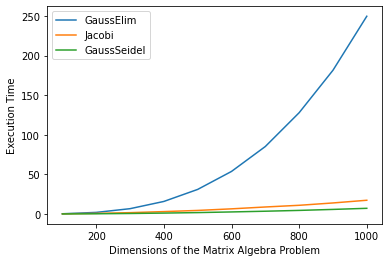

In [ ]:
import time
import matplotlib.pyplot as plt

#initialize a list of possible matrix dimensions (100, 200, 300, ... , 1000)
matrix_dims = [100 + i*100 for i in range(10)]

#initialize lists of matrices and vectors using each of those dims.
matrices = [randmat(n) for n in matrix_dims]
vectors = [randvec(n) for n in matrix_dims]

err = 1e-6 #set the error tolerance

#set up a dictionary for recording the execution times of each algorithm
time_dict = {
    "GaussElim": [],
    "Jacobi": [],
    "GaussSeidel": []
}


for i in range(10):  
  matrix = matrices[i]
  vector = vectors[i]

  #first, time Gaussian Elimination
  start = time.time()
  solution = GaussElim(matrix, vector.T)
  end = time.time()
  time_dict["GaussElim"].append(end - start)

  #next, time Jacobi
  start = time.time()
  solution = Jacobi(matrix, vector, err)
  end = time.time()
  time_dict["Jacobi"].append(end - start)

  #last, time Gauss-Seidel
  start = time.time()
  solution = GaussSeidel(matrix, vector, err)
  end = time.time()
  time_dict["GaussSeidel"].append(end - start)

#after recording all the computation times, plot them
plt.plot(matrix_dims, time_dict["GaussElim"], label = "GaussElim")
plt.plot(matrix_dims, time_dict["Jacobi"], label = "Jacobi")
plt.plot(matrix_dims, time_dict["GaussSeidel"], label = "GaussSeidel")
plt.xlabel("Dimensions of the Matrix Algebra Problem")
plt.ylabel("Execution Time")
plt.legend()
plt.show()

If you are interested in, then you can make a code using the "theoretically simplest method". For $Ax = b$, $x = A^{-1}b$. By using Gauss Elimination, you may compute $A^{-1}$ and then compute $A^{-1}b$. Recall that one can compute $A^{-1}$ as the following:
<ul>
    <li>Make an augmented matrix $[A | I]$ where $I$ is the $n \times n$ identity matrix.</li>
    <li>Apply elementary row operations until the left half $A$ on $[A| I]$ becomes $I$.</li>
    <li>Then the right half of the augmented matrix is $A^{-1}$.</li>
</ul>
Compare the performance of this method with above three methods.